In [1]:
include("../ntl.jl")
import Random
Random.seed!(1)

Random.MersenneTwister(UInt32[0x00000001], Random.DSFMT.DSFMT_state(Int32[1749029653, 1072851681, 1610647787, 1072862326, 1841712345, 1073426746, -198061126, 1073322060, -156153802, 1073567984  …  1977574422, 1073209915, 278919868, 1072835605, 1290372147, 18858467, 1815133874, -1716870370, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000

In [2]:
using LinearAlgebra

data_covariance = Matrix{Float64}(0.001I, 2, 2)
prior_covariance = Matrix{Float64}(I, 2, 2)
prior_mean = Vector{Float64}(zeros(2))
data_parameters = Ntl.Models.GaussianParameters(data_covariance, prior_mean, prior_covariance)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
geometric_arrival = Ntl.Models.GeometricArrivals(phi_prior)
cluster_parameters = Ntl.Models.NtlParameters(psi_prior, geometric_arrival)

mixture = Ntl.Generate.generate(100, data_parameters, cluster_parameters)
data = Matrix(transpose(mixture[:, 2:end]))
true_clustering = mixture[:, 1]

┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = generate(::Int64, ::Main.Ntl.Models.GaussianParameters, ::Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals}) at synthetic.jl:98
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:98
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = generate(::Int64, ::Main.Ntl.Models.GaussianParameters, ::Main.Ntl.Models.NtlParameters{Main.Ntl.Models.GeometricArrivals}) at synthetic.jl:100
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:100


100-element Array{Float64,1}:
  1.0
  2.0
  3.0
  2.0
  2.0
  2.0
  2.0
  3.0
  2.0
  4.0
  5.0
  5.0
  5.0
  ⋮  
 33.0
 35.0
 36.0
 35.0
 37.0
 37.0
 35.0
 38.0
 38.0
 37.0
 39.0
 39.0

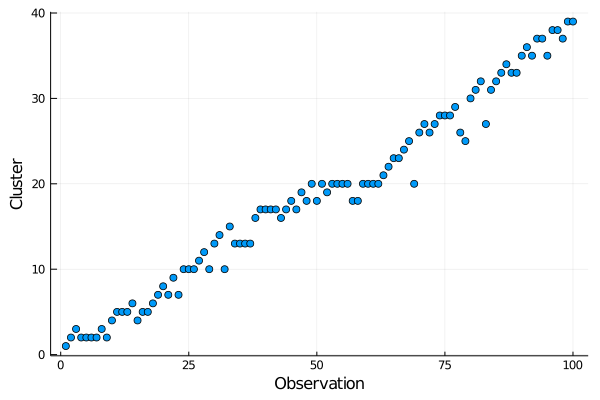

In [3]:
Ntl.Plot.plot_assignments(true_clustering)

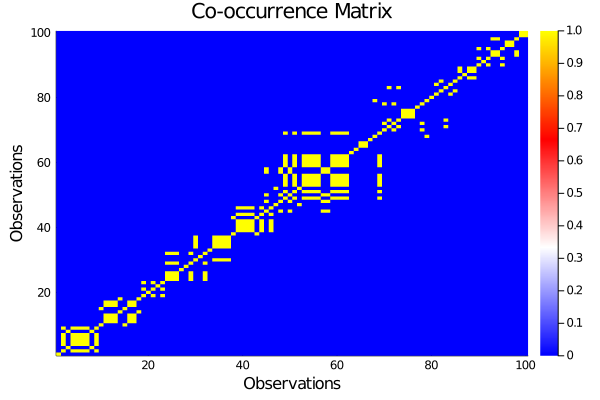

In [4]:
Ntl.Plot.plot_co_occurrence_matrix(true_clustering)

Iteration: 2/1000
Iteration: 3/1000
Iteration: 4/1000
Iteration: 5/1000
Iteration: 6/1000
Iteration: 7/1000
Iteration: 8/1000
Iteration: 9/1000
Iteration: 10/1000
Iteration: 11/1000
Iteration: 12/1000
Iteration: 13/1000
Iteration: 14/1000
Iteration: 15/1000
Iteration: 16/1000
Iteration: 17/1000
Iteration: 18/1000
Iteration: 19/1000
Iteration: 20/1000
Iteration: 21/1000
Iteration: 22/1000
Iteration: 23/1000
Iteration: 24/1000
Iteration: 25/1000
Iteration: 26/1000
Iteration: 27/1000
Iteration: 28/1000
Iteration: 29/1000
Iteration: 30/1000
Iteration: 31/1000
Iteration: 32/1000
Iteration: 33/1000
Iteration: 34/1000
Iteration: 35/1000
Iteration: 36/1000
Iteration: 37/1000
Iteration: 38/1000
Iteration: 39/1000
Iteration: 40/1000
Iteration: 41/1000
Iteration: 42/1000
Iteration: 43/1000
Iteration: 44/1000
Iteration: 45/1000
Iteration: 46/1000
Iteration: 47/1000
Iteration: 48/1000
Iteration: 49/1000
Iteration: 50/1000
Iteration: 51/1000
Iteration: 52/1000
Iteration: 53/1000
Iteration: 54/1000
I

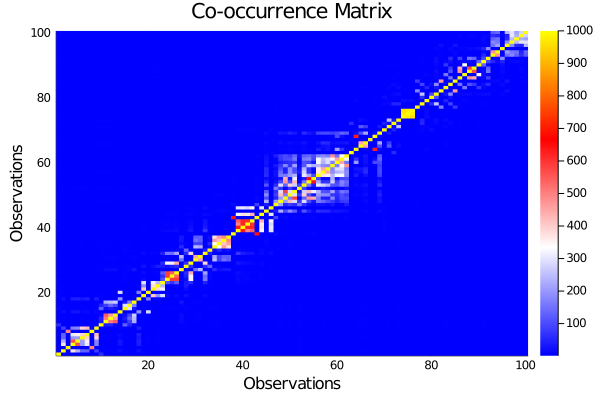

In [5]:
markov_chain = Ntl.Fitter.fit(data, data_parameters, cluster_parameters, 100, "gibbs")
Ntl.Plot.plot_co_occurrence_matrix(Matrix(markov_chain))